Moyennes par groupe :
methode
grpA    10.0
grpB    12.0
grpC    15.5
Name: score, dtype: float64

Table ANOVA :
            sum_sq    df          F        PR(>F)
C(methode)   155.0   2.0  25.363636  6.319308e-07
Residual      82.5  27.0        NaN           NaN

            sum_sq    df    mean_sq          F        PR(>F)    eta_sq  \
C(methode)   155.0   2.0  77.500000  25.363636  6.319308e-07  0.652632   
Residual      82.5  27.0   3.055556        NaN           NaN       NaN   

            omega_sq  
C(methode)  0.618938  
Residual         NaN  
0.6526315789473685
Test de Tukey :
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  grpA   grpB      2.0 0.0421 0.0618 3.9382   True
  grpA   grpC      5.5    0.0 3.5618 7.4382   True
  grpB   grpC      3.5 0.0004 1.5618 5.4382   True
--------------------------------------------------



C:\Users\Administrateur\AppData\Local\Temp\ipykernel_5568\3320785571.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov["omega_sq"] = (aov[:-1]["sum_sq"] - (aov[:-1]["df"] * aov["mean_sq"][-1])) / (
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_5568\3320785571.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum(aov["sum_sq"]) + aov["mean_sq"][-1]


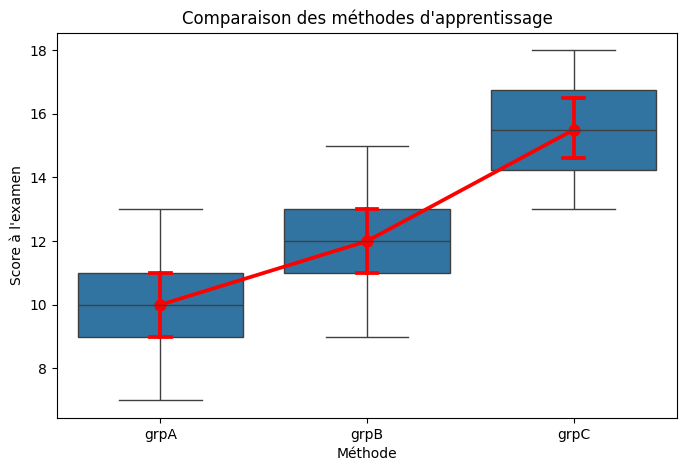

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import numpy as np

# -----------------------------
# 1️⃣ Données
# -----------------------------

grpA = [10, 11, 9, 12, 8, 13, 7, 10, 11, 9]
grpB = [12, 13, 11, 14, 10, 15, 9, 12, 13, 11]
grpC = [14, 15, 16, 13, 17, 18, 14, 16, 15, 17]

# Création d'un DataFrame long (format adapté à statsmodels)
data = pd.DataFrame(
    {
        "score": grpA + grpB + grpC,
        "methode": ["grpA"] * 10 + ["grpB"] * 10 + ["grpC"] * 10,
    }
)

print("Moyennes par groupe :")
print(data.groupby("methode")["score"].mean())
print()

# -----------------------------
# 2️⃣ ANOVA à un facteur
# -----------------------------

model = ols("score ~ C(methode)", data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Table ANOVA :")
print(anova_table)
print()


def anova_table2(aov):
    aov["mean_sq"] = aov[:]["sum_sq"] / aov[:]["df"]

    aov["eta_sq"] = aov[:-1]["sum_sq"] / sum(aov["sum_sq"])

    aov["omega_sq"] = (aov[:-1]["sum_sq"] - (aov[:-1]["df"] * aov["mean_sq"][-1])) / (
        sum(aov["sum_sq"]) + aov["mean_sq"][-1]
    )

    cols = ["sum_sq", "df", "mean_sq", "F", "PR(>F)", "eta_sq", "omega_sq"]
    aov = aov[cols]
    return aov


print(anova_table2(anova_table))


def compute_eta_squared(g1, g2, g3):
    all_data = np.array(g1 + g2 + g3)
    mean_global = np.mean(all_data)
    ss_total = np.sum((all_data - mean_global) ** 2)
    ss_between = sum([len(g) * (np.mean(g) - mean_global) ** 2 for g in [g1, g2, g3]])
    return ss_between / ss_total


print(compute_eta_squared(grpA, grpB, grpC))

# -----------------------------
# 3️⃣ Test post hoc de Tukey
# -----------------------------

tukey = pairwise_tukeyhsd(
    endog=data["score"],
    groups=data["methode"],
    alpha=0.05,
)

print("Test de Tukey :")
print(tukey)
print()

# -----------------------------
# 4️⃣ Visualisation
# -----------------------------

plt.figure(figsize=(8, 5))
sns.boxplot(x="methode", y="score", data=data)
sns.pointplot(
    x="methode",
    y="score",
    data=data,
    estimator=np.mean,
    errorbar="ci",
    capsize=0.1,
    color="red",
)

plt.title("Comparaison des méthodes d'apprentissage")
plt.ylabel("Score à l'examen")
plt.xlabel("Méthode")
plt.show()
